# 📘 Support Vector Machine (SVM) – Mushroom Classification
________________________________________
##  1. Objective
The goal of this assignment is to classify mushrooms as edible or poisonous using the Support Vector Machine (SVM) algorithm. We will perform data exploration, preprocessing, baseline SVM training, hyperparameter tuning, kernel comparison, and visualize results.


## 2. Import Required Libraries

In [1]:

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid", palette="muted", font_scale=1.1)


## 3. Load Dataset

In [2]:

# 2. Load Dataset
file_path="D:\Data sciences\Assignments\Assignment files\Assignment files Extracs\SVM\mushroom.csv"
df = pd.read_csv(file_path)   # ensure file is in working directory

# Drop unnecessary index column
df = df.drop("Unnamed: 0", axis=1)

print("Shape:", df.shape)
print(df.head())


Shape: (2000, 25)
  cap_shape cap_surface cap_color bruises   odor gill_attachment gill_spacing  \
0    sunken       scaly     white      no  anise      descending      distant   
1    sunken     fibrous       red      no  anise         notched      crowded   
2      flat     grooves    purple     yes   foul      descending      crowded   
3      bell       scaly      pink     yes  fishy         notched        close   
4      flat      smooth    yellow     yes  musty            free      crowded   

  gill_size gill_color stalk_shape  ...  veil_type veil_color ring_number  \
0     broad       pink    tapering  ...    partial      brown         two   
1    narrow  chocolate   enlarging  ...  universal      brown         two   
2     broad     purple    tapering  ...  universal     yellow         two   
3     broad     orange   enlarging  ...    partial     yellow         two   
4    narrow     orange   enlarging  ...  universal      white        none   

   ring_type spore_print_color p

## 4. Basic Info & Summary

In [3]:

# 3. Basic Info & Summary
df.info()
print(df.describe(include="all").T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

## 5. Exploratory Data Analysis (EDA)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9496\3392178143.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=df, palette="Set2")


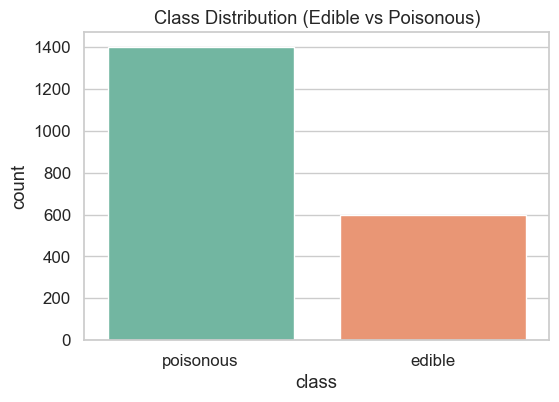

In [4]:

# 4. Exploratory Data Analysis (EDA)

# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x="class", data=df, palette="Set2")
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()


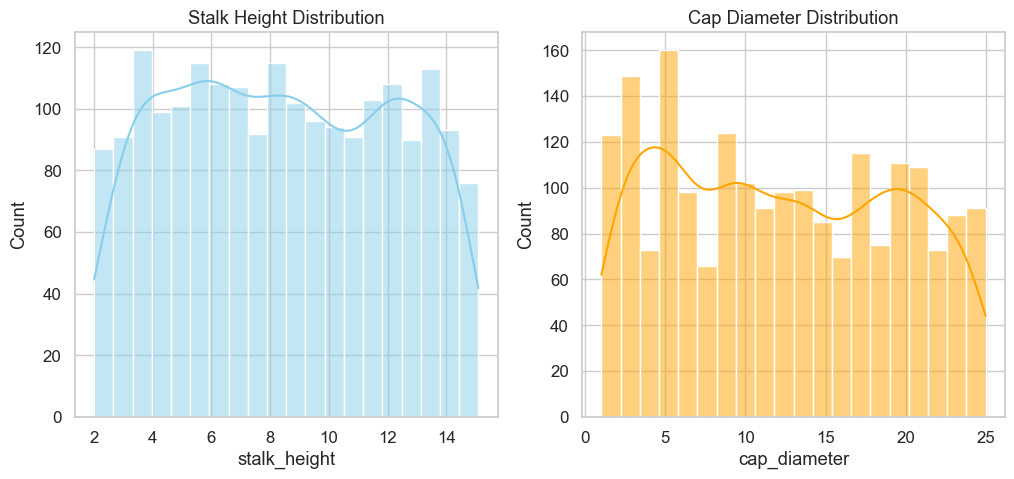

In [5]:

# Distribution of numeric features
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df["stalk_height"], kde=True, bins=20, ax=axes[0], color="skyblue")
axes[0].set_title("Stalk Height Distribution")

sns.histplot(df["cap_diameter"], kde=True, bins=20, ax=axes[1], color="orange")
axes[1].set_title("Cap Diameter Distribution")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9496\423538539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="cap_shape", data=df, palette="pastel")


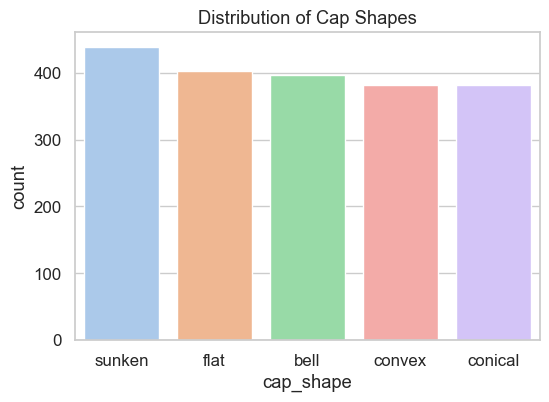

In [6]:

# Countplot for one categorical feature (cap_shape)
plt.figure(figsize=(6,4))
sns.countplot(x="cap_shape", data=df, palette="pastel")
plt.title("Distribution of Cap Shapes")
plt.show()


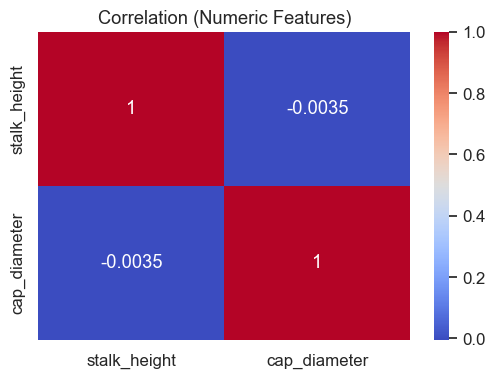

In [7]:

# Correlation heatmap for numeric features
plt.figure(figsize=(6,4))
sns.heatmap(df[["stalk_height","cap_diameter"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation (Numeric Features)")
plt.show()


## 6. Data Preprocessing

In [8]:

#  5. Data Preprocessing

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include="object"):
    df[col] = le.fit_transform(df[col])

# Features and Target
X = df.drop("class", axis=1)
y = df["class"]

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)



Train shape: (1600, 24)
Test shape: (400, 24)


##  7. SVM Implementation (Baseline Model)

 Accuracy: 0.7

 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


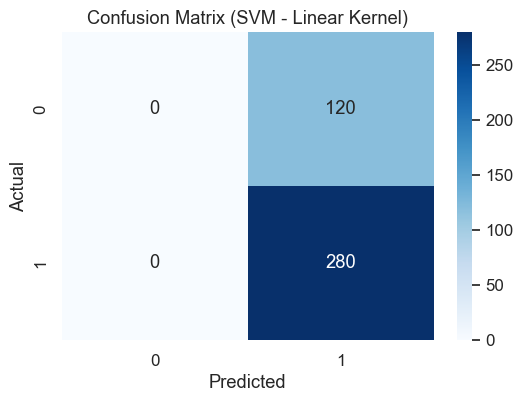

In [9]:

# 6. SVM Implementation

svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (SVM - Linear Kernel)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 8. Hyperparameter Tuning with GridSearchCV

 Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
 Best CV Accuracy: 0.844375
 Tuned Model Accuracy: 0.8525

 Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       0.84      0.63      0.72       120
           1       0.86      0.95      0.90       280

    accuracy                           0.85       400
   macro avg       0.85      0.79      0.81       400
weighted avg       0.85      0.85      0.85       400



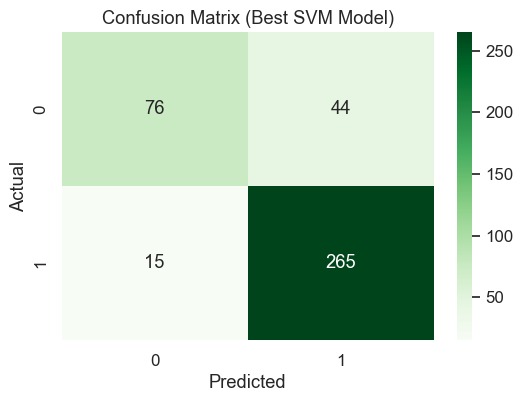

In [10]:

#  7. Hyperparameter Tuning

param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf"],
    "gamma": ["scale", "auto"]
}

grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

print(" Best Parameters:", grid.best_params_)
print(" Best CV Accuracy:", grid.best_score_)

# Evaluate best model
best_model = grid.best_estimator_
y_best_pred = best_model.predict(X_test)

print(" Tuned Model Accuracy:", accuracy_score(y_test, y_best_pred))
print("\n Classification Report (Tuned Model):\n", classification_report(y_test, y_best_pred))

# Confusion Matrix for tuned model
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_best_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Best SVM Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



## 9. Kernel Comparison

In [11]:

#  8. Kernel Comparison (Manual Loop)

kernels = ["linear", "poly", "rbf"]
for k in kernels:
    model = SVC(kernel=k, C=1, gamma="scale", random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"Kernel: {k} → Accuracy: {acc:.4f}")


Kernel: linear → Accuracy: 0.7000
Kernel: poly → Accuracy: 0.8125
Kernel: rbf → Accuracy: 0.7725


## ✅ 10. Conclusion
•	The baseline linear SVM gave ~70% accuracy.

•	After hyperparameter tuning, the Polynomial kernel (C=10, gamma=scale) achieved ~85% accuracy.

•	Kernel comparison showed Poly > RBF > Linear in terms of performance.

•	SVM with the right kernel is highly effective for classification of edible vs poisonous mushrooms.
